In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import itertools

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
# Load the data
df = pd.read_csv("creditcard.csv")

In [3]:
# Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
# Summary of the Amount column
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [5]:
# Check class distribution (balanced or imbalanced)
class_counts = df['Class'].value_counts()
genuine_percent = class_counts[0] / df['Class'].count() * 100
fraud_percent = class_counts[1] / df['Class'].count() * 100

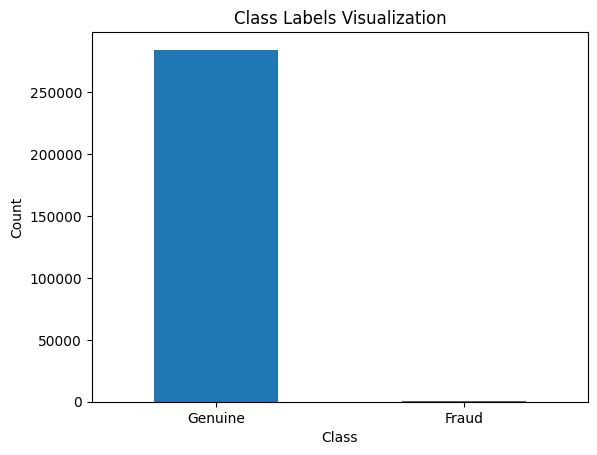

In [6]:
# Visualize the classes
labels = ['Genuine', 'Fraud']
class_counts.plot(kind='bar', rot=0)
plt.title("Class Labels Visualization")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [7]:
# Scaling the 'Amount' column and dropping the 'Amount' and 'Time' columns
scaler = StandardScaler()
df['Normalized_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df.drop(['Amount', 'Time'], inplace=True, axis=1)

In [8]:
# Splitting features and labels
y = df.Class
x = df.drop(['Class'], axis=1)

In [9]:
# Splitting the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
# Training and evaluating Decision Tree model
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
y_pred1 = model_dt.predict(x_test)

In [11]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred1.round())
model_dt_score = model_dt.score(x_test, y_test) * 100

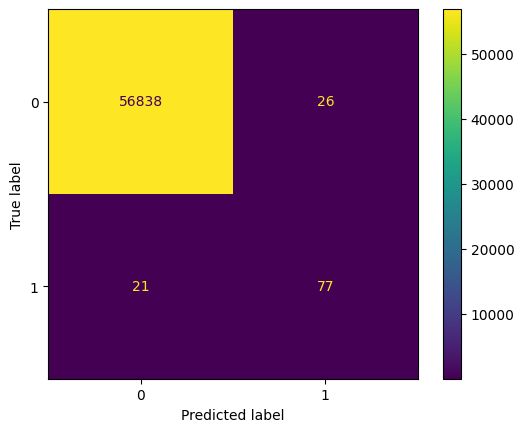

In [14]:
# Visualize Decision Tree confusion matrix
cm_dt = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt, display_labels=[0, 1])
cm_dt.plot()
plt.show()

In [15]:
# Evaluate Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred1)
f1_score_dt = f1_score(y_test, y_pred1)
recall_dt = recall_score(y_test, y_pred1)
precision_dt = precision_score(y_test, y_pred1)

In [16]:
# Random Forest model
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
y_pred2 = model_rf.predict(x_test)

In [17]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred2.round())
model_rf_score = model_rf.score(x_test, y_test) * 100

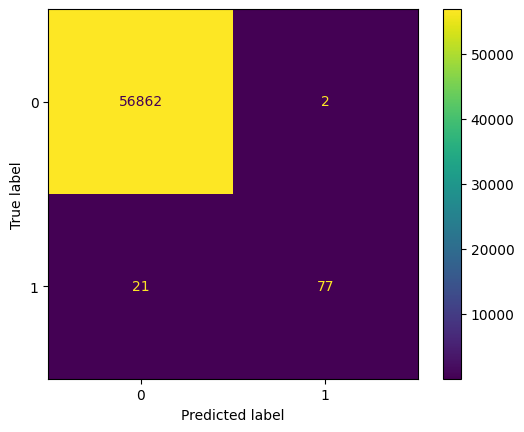

In [18]:
# Visualize Random Forest confusion matrix
cm_rf = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf, display_labels=[0, 1])
cm_rf.plot()
plt.show()

In [19]:
# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred2)
f1_score_rf = f1_score(y_test, y_pred2)
recall_rf = recall_score(y_test, y_pred2)
precision_rf = precision_score(y_test, y_pred2)

In [20]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [21]:
model_lg = LogisticRegression()
model_lg.fit(x_train, y_train)
y_pred3 = model_lg.predict(x_test)

In [22]:
model_lg_score = model_lg.score(x_test, y_test) * 100

In [23]:
# Evaluate Logistic Regression model
accuracy_lg = accuracy_score(y_test, y_pred3)
f1_score_lg = f1_score(y_test, y_pred3)
recall_lg = recall_score(y_test, y_pred3)
precision_lg = precision_score(y_test, y_pred3)

In [24]:
# Address class imbalance issue using SMOTE
x_resampled, y_resampled = SMOTE().fit_resample(x, y)

In [25]:
# Splitting the resampled data into training and testing sets (80% training, 20% testing)
x_re_train, x_re_test, y_re_train, y_re_test = train_test_split(x_resampled, y_resampled, random_state=42)

In [26]:
# Random Forest model with resampled data
resampled_rf = RandomForestClassifier(n_estimators=100, random_state=42)
resampled_rf.fit(x_re_train, y_re_train)
y_re_pred = resampled_rf.predict(x_re_test)

In [27]:
confusion_matrix_resampled_rf = confusion_matrix(y_re_test, y_re_pred.round())
resampled_rf_score = resampled_rf.score(x_re_test, y_re_test) * 100

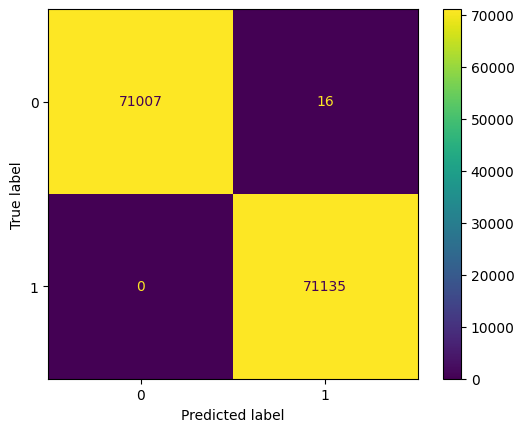

In [28]:
# Visualize confusion matrix for Random Forest with resampled data
cm_resampled_rf = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_resampled_rf, display_labels=[0, 1])
cm_resampled_rf.plot()
plt.show()

In [29]:
# Evaluate Random Forest model with resampled data
accuracy_resampled_rf = accuracy_score(y_re_test, y_re_pred)
f1_score_resampled_rf = f1_score(y_re_test, y_re_pred)
recall_resampled_rf = recall_score(y_re_test, y_re_pred)
precision_resampled_rf = precision_score(y_re_test, y_re_pred)

In [30]:
# Print results
print("\nDecision Tree Model Results:")
print(f"Model Score: {model_dt_score:.2f}%")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1 Score: {f1_score_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"F1 Score: {f1_score_dt:.2f}")

print("\nRandom Forest Model Results:")
print(f"Model Score: {model_rf_score:.2f}%")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_score_rf:.2f}")

print("\nLogistic Regression Model Results:")
print(f"Model Score: {model_lg_score:.2f}%")
print(f"Precision: {precision_lg:.2f}")
print(f"Recall: {recall_lg:.2f}")
print(f"F1 Score: {f1_score_lg:.2f}")

print("\nRandom Forest Model Results with Resampled Data:")
print(f"Model Score: {resampled_rf_score:.2f}%")
print(f"Precision: {precision_resampled_rf:.2f}")
print(f"Recall: {recall_resampled_rf:.2f}")
print(f"F1 Score: {f1_score_resampled_rf:.2f}")


Decision Tree Model Results:
Model Score: 99.92%
Precision: 0.75
Recall: 0.79
F1 Score: 0.77
Precision: 0.75
F1 Score: 0.77

Random Forest Model Results:
Model Score: 99.96%
Precision: 0.97
Recall: 0.79
F1 Score: 0.87

Logistic Regression Model Results:
Model Score: 99.91%
Precision: 0.86
Recall: 0.58
F1 Score: 0.70

Random Forest Model Results with Resampled Data:
Model Score: 99.99%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
